# Transformations composition

Since we can think of matrices as we think of transformations, we can apply multiple transformation one after the other and represent them as matrix multiplication. For instance, this is a rotation matrix:

$$
R = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}
$$

And this is a shear matrix:

$$
S = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}
$$

If we apply to a point $\vec{P_1}$ the rotation $R$ we get a new point $P_R$:

$$
P_R = R * P = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} * \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -y \\ x \end{pmatrix} 
$$

I f we then apply a the shear $S$, we will have a new point $P_{SR}$:

$$
P_{SR} = S * P_R = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix} * \begin{pmatrix} -y \\ x \end{pmatrix} = \begin{pmatrix} -y + x \\ x \end{pmatrix}
$$

What if we multiply $S$ and $R$ matrix and then apply the composition matrix to the point $P$?

$$
S * R * P = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix} * \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} * P = \begin{pmatrix} 1 & -1 \\ 1 & 0 \end{pmatrix} * \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} x - y \\ x \end{pmatrix} 
$$

Which is exactly what we got previously! Notice that applying a rotation and then a shear is different than applying a shear and then a rotation. In math terms:

$$
P_{SR} \neq P_{RS}
$$

In fact:

$$
S * R \neq R * S
$$

If we are intrested in knowing where $\hat{i}$ and $\hat{j}$ land after the two transformations, we can watch, respectively, at the first and second column of the composition matrix. 





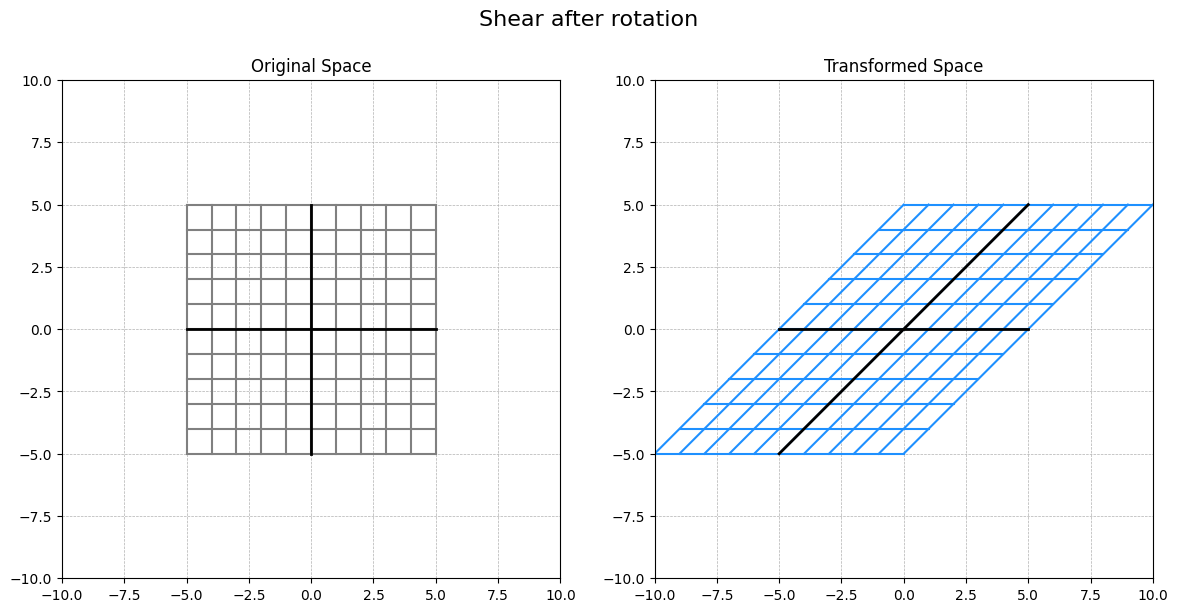

In [ ]:
# Visualization of S * R != R * S

import matplotlib.pyplot as plt
import numpy as np

def plot_grid(ax, grid, color='gray', linestyle='-'):
    """Plots a 2D grid of points connected by lines."""
    # Plot vertical lines
    for i in range(grid.shape[1]):
        ax.plot(grid[0, i, :], grid[1, i, :], color=color, linestyle=linestyle)
    # Plot horizontal lines
    for i in range(grid.shape[2]):
        ax.plot(grid[0, :, i], grid[1, :, i], color=color, linestyle=linestyle)

def visualize_transformation(transformation_matrix, title):
    """
    Visualizes the effect of a linear transformation on a 2D grid.

    Args:
        transformation_matrix (np.ndarray): A 2x2 matrix representing the linear transformation.
        title (str): The title for the plot.
    """
    # Define the original grid of points
    x = np.linspace(-5, 5, 11)
    y = np.linspace(-5, 5, 11)
    xx, yy = np.meshgrid(x, y)
    original_grid = np.array([xx, yy])

    # Apply the linear transformation to each point on the grid
    # We reshape the grid to a list of 2D points, apply the matrix multiplication,
    # and then reshape it back to the original grid structure.
    points = original_grid.reshape(2, -1)
    transformed_points = transformation_matrix @ points
    transformed_grid = transformed_points.reshape(original_grid.shape)

    # --- Plotting ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title, fontsize=16)

    # Plot Original Grid
    ax1.set_title("Original Space")
    plot_grid(ax1, original_grid, color='gray')
    # Highlight the axes
    ax1.plot([-5, 5], [0, 0], 'k-', lw=2) # x-axis
    ax1.plot([0, 0], [-5, 5], 'k-', lw=2) # y-axis
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-10, 10)
    ax1.set_aspect('equal', adjustable='box')
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot Transformed Grid
    ax2.set_title("Transformed Space")
    plot_grid(ax2, transformed_grid, color='dodgerblue')
    # Highlight the transformed axes
    transformed_x_axis = transformation_matrix @ np.array([[-5, 5], [0, 0]])
    transformed_y_axis = transformation_matrix @ np.array([[0, 0], [-5, 5]])
    ax2.plot(transformed_x_axis[0], transformed_x_axis[1], 'k-', lw=2)
    ax2.plot(transformed_y_axis[0], transformed_y_axis[1], 'k-', lw=2)
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-10, 10)
    ax2.set_aspect('equal', adjustable='box')
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


shear_matrix = np.array([
    [1, 1],
    [0, 1]
])

rotation_matrix = np.array([
    [0, -1],
    [1,  0]
])

SR = np.matmul(shear_matrix, rotation_matrix )
RS = np.matmul(rotation_matrix, shear_matrix  )
visualize_transformation(SR, "Shear after rotation")
visualize_transformation(RS, "Rotation after shear")
